# User Overview Analysis

In [1]:
import os

os.chdir("..")  # set the working directory one level up
from scripts.db_connection import DbConnection
from scripts.analyzer import Analyzer
from scripts.graph import Graph

# import pandas as pd

## load the data 

In [2]:
db_connection = DbConnection()
analyzer = Analyzer()
engin = db_connection.get_engine()
query = db_connection.get_query()
df = analyzer.load_data(query, engin)
df.head()

DB connection engine created successfully.


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,6.917538e+18,4/27/2019 16:48,581.0,4/28/2019 0:45,956.0,28629.0,2.082017e+14,3.368908e+10,3.562051e+13,W42046C,...,6624685.0,14359287.0,16525739.0,15714976.0,795812180.0,11589951.0,400466676.0,1727898.0,46167921.0,830108755.0
1,7.277826e+18,4/27/2019 16:48,667.0,4/28/2019 3:15,224.0,37623.0,2.082018e+14,3.378380e+10,3.572231e+13,T83830B,...,20523749.0,19425580.0,13359593.0,9934665.0,787605714.0,10917685.0,675248509.0,7214331.0,50007602.0,824368038.0
2,7.349883e+18,4/27/2019 16:48,168.0,4/28/2019 3:15,224.0,37623.0,2.082018e+14,3.378380e+10,3.572231e+13,T83830B,...,20732615.0,4238634.0,12009162.0,10506778.0,291778510.0,6596766.0,661202929.0,11807415.0,36250702.0,339427949.0
3,1.304243e+19,4/27/2019 16:48,687.0,4/28/2019 0:59,532.0,29434.0,2.082017e+14,3.366612e+10,3.533311e+13,T42380B,...,16943531.0,734705.0,19501511.0,14305817.0,816467501.0,7251592.0,208313429.0,4679776.0,30055352.0,861829812.0
4,1.311448e+19,4/27/2019 16:48,699.0,4/28/2019 0:59,199.0,29434.0,2.082017e+14,3.366612e+10,3.533311e+13,T42380B,...,16736260.0,20709380.0,5770047.0,15850444.0,807860284.0,2642741.0,99982792.0,10823881.0,51213020.0,842115357.0


## Data cleaning 

### Find out missing data 

In [3]:
analyzer.missing_values(df)

,Missing Value,Percentage
Nb of sec with 37500B < Vol UL,130254,86.84
Nb of sec with 6250B < Vol UL < 37500B,111843,74.56
Nb of sec with 125000B < Vol DL,97538,65.02
TCP UL Retrans. Vol (Bytes),96649,64.43
Nb of sec with 31250B < Vol DL < 125000B,93586,62.39
Nb of sec with 1250B < Vol UL < 6250B,92894,61.93
Nb of sec with 6250B < Vol DL < 31250B,88317,58.88
TCP DL Retrans. Vol (Bytes),88146,58.76
HTTP UL (Bytes),81810,54.54
HTTP DL (Bytes),81474,54.32


## Handling the missing data 

In [4]:
cleaned_data = analyzer.handle_missing_values(df)
analyzer.missing_values(cleaned_data)

,Missing Value,Percentage
Last Location Name,1153,0.77
MSISDN/Number,1066,0.71
Bearer Id,991,0.66
Nb of sec with Vol UL < 1250B,793,0.53
10 Kbps < UL TP < 50 Kbps (%),792,0.53
50 Kbps < UL TP < 300 Kbps (%),792,0.53
UL TP < 10 Kbps (%),792,0.53
UL TP > 300 Kbps (%),792,0.53
Nb of sec with Vol DL < 6250B,755,0.50
DL TP < 50 Kbps (%),754,0.50


## Finding outliers

In [5]:
outlier_indices = analyzer.outliers(cleaned_data)
outlier_indices

Index([    37,     49,     88,    111,    118,    170,    203,    220,    371,
          428,
       ...
       149333, 149410, 149453, 149618, 149673, 149805, 149853, 149958, 149968,
       149999],
      dtype='int64', length=1553)

### Handling outliers

In [6]:
cleaned_data = analyzer.handle_outliers(cleaned_data)

## Descriptive statistics  

In [7]:
cleaned_data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.475290e+05,148447.000000,148447.000000,1.484470e+05,1.479040e+05,1.474160e+05,1.479020e+05,148448.000000,148448.000000,148447.000000,...,1.484480e+05,1.484480e+05,1.484480e+05,1.484480e+05,1.484480e+05,1.484480e+05,1.484480e+05,1.484480e+05,1.484470e+05,1.484470e+05
mean,1.014268e+19,499.168713,498.823290,1.049055e+05,2.082016e+14,4.196742e+10,4.839560e+13,85.076343,13.780649,13337.636961,...,1.163462e+07,1.100865e+07,1.162756e+07,1.100439e+07,4.220516e+08,8.288670e+06,4.212149e+08,8.266479e+06,4.112424e+07,4.546528e+08
std,2.892679e+18,288.583664,288.087033,8.097054e+04,2.159837e+10,2.460020e+12,2.236615e+13,123.044099,19.392422,24017.729970,...,6.710547e+06,6.344154e+06,6.724991e+06,6.360051e+06,2.440234e+08,4.782039e+06,2.431492e+08,4.767900e+06,1.127310e+07,2.442012e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.787650e+04,2.082014e+14,3.365129e+10,3.546071e+13,35.000000,3.000000,43.000000,...,5.833528e+06,5.518459e+06,5.777327e+06,5.478315e+06,2.103686e+08,4.130550e+06,2.105020e+08,4.150193e+06,3.322692e+07,2.430056e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572171e+13,54.000000,7.000000,63.000000,...,1.161758e+07,1.101182e+07,1.164013e+07,1.100039e+07,4.234650e+08,8.291135e+06,4.220617e+08,8.269630e+06,4.114853e+07,4.559760e+08
75%,1.304243e+19,749.000000,750.000000,1.328260e+05,2.082018e+14,3.368355e+10,8.611970e+13,109.795706,17.662883,19822.500000,...,1.744994e+07,1.651376e+07,1.747150e+07,1.650990e+07,6.332687e+08,1.243253e+07,6.316718e+08,1.238391e+07,4.903301e+07,6.658035e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,1787.000000,246.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


# Top Handsets and Manufacturers

## Top 10 Handsets:

In [8]:
top_handsets = df["Handset Type"].value_counts().head(10)
print("____Top 10 Handsets________\n", top_handsets)

____Top 10 Handsets________
 Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


`Interpretation`: The Huawei B528S-23A is the most popular handset, followed by various Apple iPhone models. The "undefined" category indicates possible data issues.

`Recommendation`: Promote the Huawei B528S-23A and popular iPhones. Address and correct the "undefined" data category for better accuracy

## Top 3 Handset Manufacturers:


In [9]:
top_manufacturers = df["Handset Manufacturer"].value_counts().head(3)
print("___Top 3 Handset Manufacturers___\n", top_manufacturers)

___Top 3 Handset Manufacturers___
 Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


`Interpretation`: Apple leads significantly in handset numbers, with Samsung and Huawei as the next top manufacturers.

`Recommendation`: Focus marketing on Apple products due to their high usage. Create strategies to boost engagement for Samsung and Huawei users.

In [10]:
top_manufacturers = df["Bearer Id"].value_counts()

## Top 5 Handsets per Top 3 Handset Manufacturers:



In [11]:
top_5_handsets_per_manufacturer = df[
    df["Handset Manufacturer"].isin(top_manufacturers.index)
]
top_5_handsets_per_manufacturer = (
    top_5_handsets_per_manufacturer.groupby("Handset Manufacturer")["Handset Type"]
    .value_counts()
    .groupby(level=0)
    .head(5)
)
print("___Top 5 Handsets per Top 3 Manufacturer___\n", top_5_handsets_per_manufacturer)

___Top 5 Handsets per Top 3 Manufacturer___
 Series([], Name: count, dtype: int64)


`Interpretation`: Apple’s top handsets are various iPhone models; Huawei’s top is the B528S-23A; Samsung’s top is the Galaxy S8.

`Recommendation`: Emphasize and promote the top handsets from each manufacturer in marketing efforts, especially Apple iPhones due to their broad appeal.

In [12]:
user_summary = analyzer.aggregate_user_data(cleaned_data)
user_summary.head()

,Number of xDR Sessions,Total Session Duration (ms),Total Download (DL) Data (Bytes),Total Upload (UL) Data (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),YouTube DL (Bytes),YouTube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
Bearer Id,,,,,,,,,,,,,,,,,,
6.917538e+18,1,24534.0,500721999.0,41704610.0,2404741.0,2410.0,5791591.0,2871336.0,782388.0,806920.0,6139644.0,2071526.0,19494278.0,14668354.0,466109357.0,5333340.0,670751043.0,15950724.0
6.917538e+18,1,21489.0,709549265.0,38693596.0,2478607.0,11936.0,3605446.0,2825198.0,446376.0,525108.0,10281221.0,18119976.0,19455048.0,10631652.0,673282567.0,2670856.0,501608458.0,3908870.0
6.917538e+18,1,27786.0,854465860.0,15548926.0,944612.0,2827.0,10373157.0,56392.0,128003.0,34038.0,5385159.0,4295851.0,15755839.0,1300571.0,821879090.0,8521398.0,472846860.0,1337849.0
6.917538e+18,1,15635.0,825786510.0,49605688.0,1817239.0,19827.0,269988.0,3696393.0,3191192.0,896670.0,12347020.0,11089528.0,2859358.0,1738176.0,805301713.0,16257481.0,24303797.0,15907613.0
6.917538e+18,1,24264.0,624957763.0,21983463.0,1867318.0,18928.0,1689296.0,195216.0,740633.0,590043.0,15231815.0,8401567.0,21563985.0,2817981.0,583864716.0,6992868.0,685122214.0,2966860.0


# Descriptive analysis 


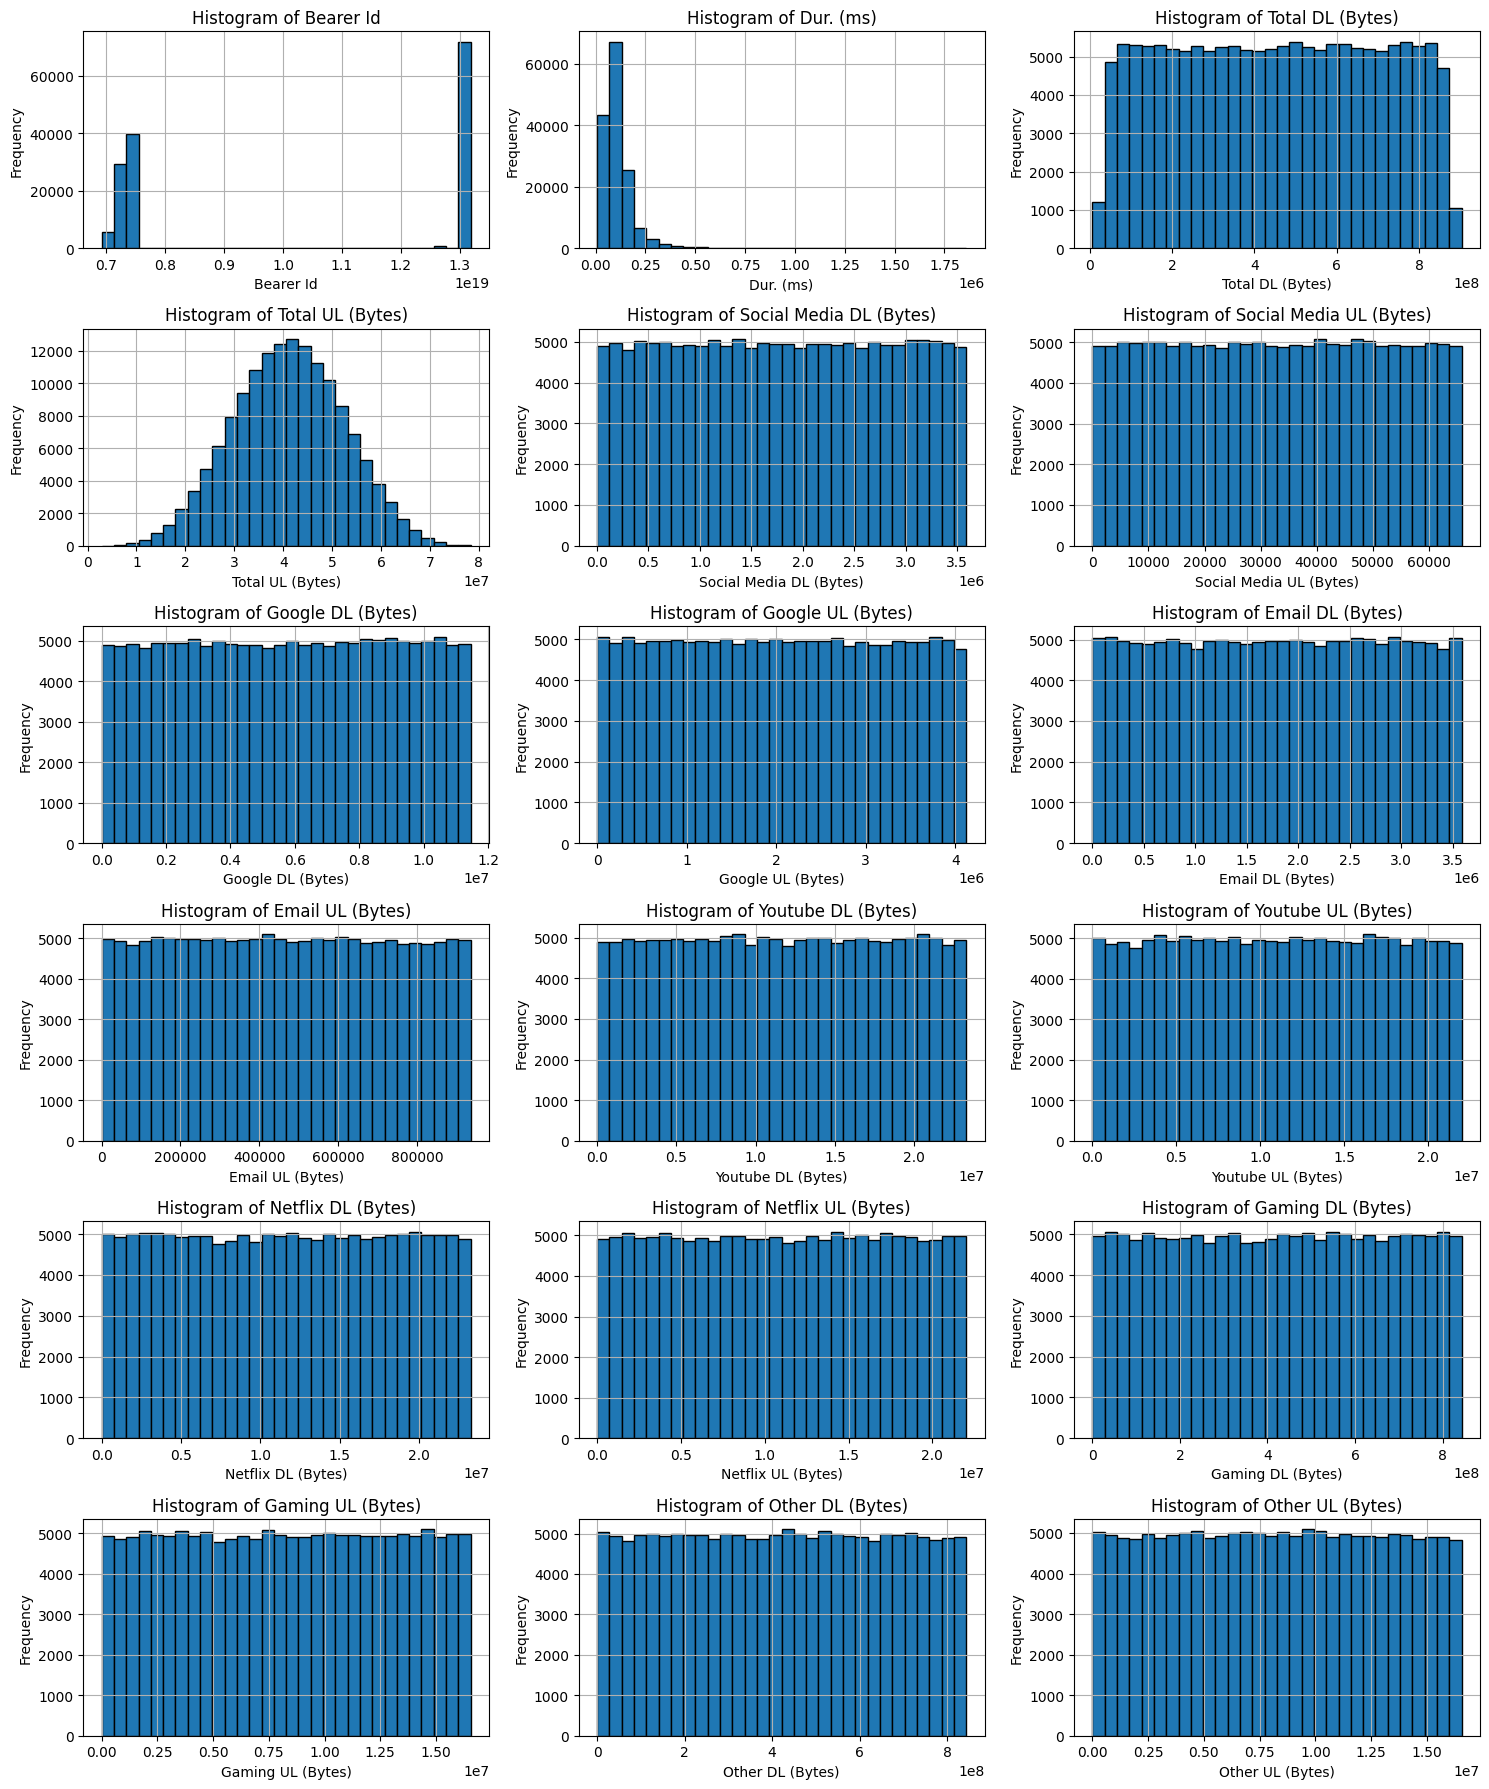

In [13]:
graph = Graph()
columns = [
    "Bearer Id",  # Number of xDR sessions
    "Dur. (ms)",  # Total session duration in ms
    "Total DL (Bytes)",  # Total download data in Bytes
    "Total UL (Bytes)",  # Total upload data in Bytes
    "Social Media DL (Bytes)",
    "Social Media UL (Bytes)",
    "Google DL (Bytes)",
    "Google UL (Bytes)",
    "Email DL (Bytes)",
    "Email UL (Bytes)",
    "Youtube DL (Bytes)",
    "Youtube UL (Bytes)",
    "Netflix DL (Bytes)",
    "Netflix UL (Bytes)",
    "Gaming DL (Bytes)",
    "Gaming UL (Bytes)",
    "Other DL (Bytes)",
    "Other UL (Bytes)",
]

graph.plot_histograms(cleaned_data, columns)

# Corelation between applications 

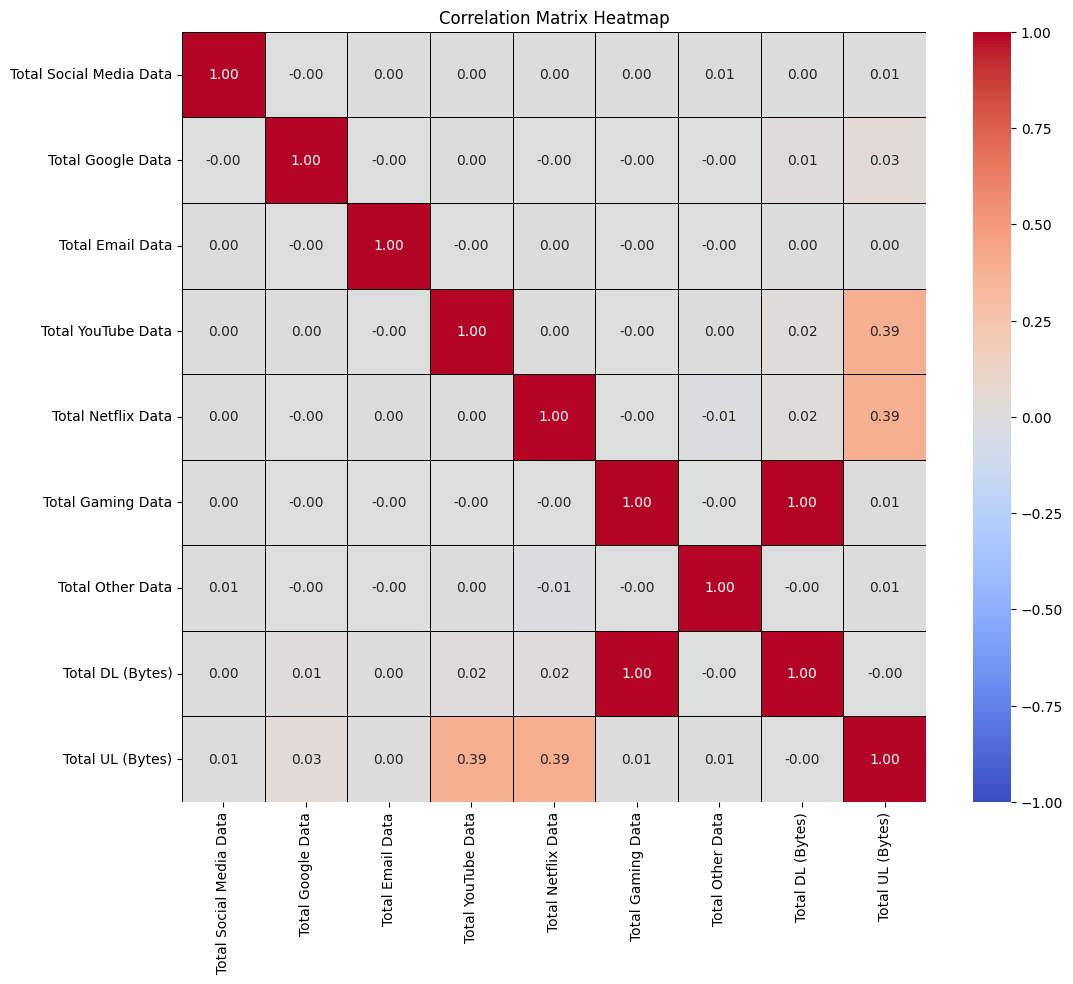

In [14]:
cor_matrix = analyzer.compute_correlations(cleaned_data)
graph.plot_correlation_heatmap(cor_matrix)